### Trying to calculate whether it would be worth getting an hsa eligble plan...

Parameters are:

- premium
- deductible
- out-of-pocket costs (non hsa)
- hsa costs (paid from hsa account)
- maximum contribution to hsa / year (set by IRS at 3600 for single people)
- tax rate paid on money that goes to out-of-pocket costs

Plan options are:

1. HSA Eligible:
  - premium: 380
  - deductible: 7,000

2. Non-HSA Eligible:
  - premium: 260
  - deductible: 8,550
  
  
Variables to consider:
- tax rate on out of pocket costs ==> higher tax rate makes HSA plan cheaper than non-HSA
- total healthcare spending ==> higher healthcare spending makes HSA plan cheaper


Parameters not included:
- prior savings in HSA
- ...


Model:

12 **x** _premium_ **+** _costs out of pocket or HSA_ **+** _taxes paid on non-hsa oop costs_


In [1]:
import pandas as pd
import matplotlib

In [2]:
def total_healthcare_costs(premium, deductible, tax_rate, oop_cost, hsa_cost):
    return (
        12 * premium + min(deductible, oop_cost + hsa_cost) + min(oop_cost, deductible) * tax_rate
    )

def hsa_cost(oop_cost, hsa_cost, premium=380, deductible=7000, tax_rate=0):
    return total_healthcare_costs(premium, deductible, tax_rate, oop_cost, hsa_cost)

def nonhsa_cost(oop_cost, premium=260, deductible=8550, tax_rate=.28):
    return total_healthcare_costs(premium, deductible, tax_rate, oop_cost, hsa_cost=0)


In [3]:
results = []
for c in range(15000):
    results.append({
        "healthcare_spending": c,
        "hsa_cost": hsa_cost(max(0, c - 3600), min(c, 3600)),
        "nonhsa_cost": nonhsa_cost(c, tax_rate=0.3),
    })

df = pd.DataFrame.from_records(results)
df.set_index(df.healthcare_spending, inplace=True)

<AxesSubplot:xlabel='healthcare_spending'>

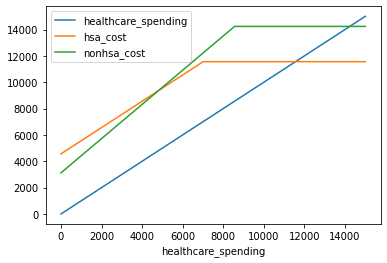

In [4]:
df.plot()